<a href="https://colab.research.google.com/github/vikaschaudhary53/cardiovascular-risk-prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Almabetter/Module/Machine Learning/Capstone Project - Classification/data_cardiovascular_risk.csv'
df = pd.read_csv(path)

#Data Preperation

In [4]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [6]:
df.shape

(3390, 17)

In [7]:
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [8]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [10]:
#Filling 'null'/'nan' values
df['education'].fillna(df['education'].median(), inplace = True)
df['BPMeds'].fillna(df['BPMeds'].mode(), inplace = True)
df['totChol'].fillna(df['totChol'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)
df['heartRate'].fillna(df['heartRate'].median(), inplace = True)
df['glucose'].fillna(df['glucose'].median(), inplace = True)
df['cigsPerDay'].fillna(int(df['cigsPerDay'].mode()), inplace = True)
df['BPMeds'].fillna(df['BPMeds'].median(), inplace = True)

In [11]:
df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [12]:
df.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [13]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.00000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
mean,1694.500000,49.542183,1.971681,9.010619,0.029499,0.006490,0.315339,0.025664,237.039823,132.60118,82.883038,25.793251,75.976991,81.720059,0.150737
std,978.753033,8.592878,1.005925,11.862839,0.169224,0.080309,0.464719,0.158153,44.994205,22.29203,12.023581,4.107026,11.970114,23.161265,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.030000,68.000000,72.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,27.997500,83.000000,85.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


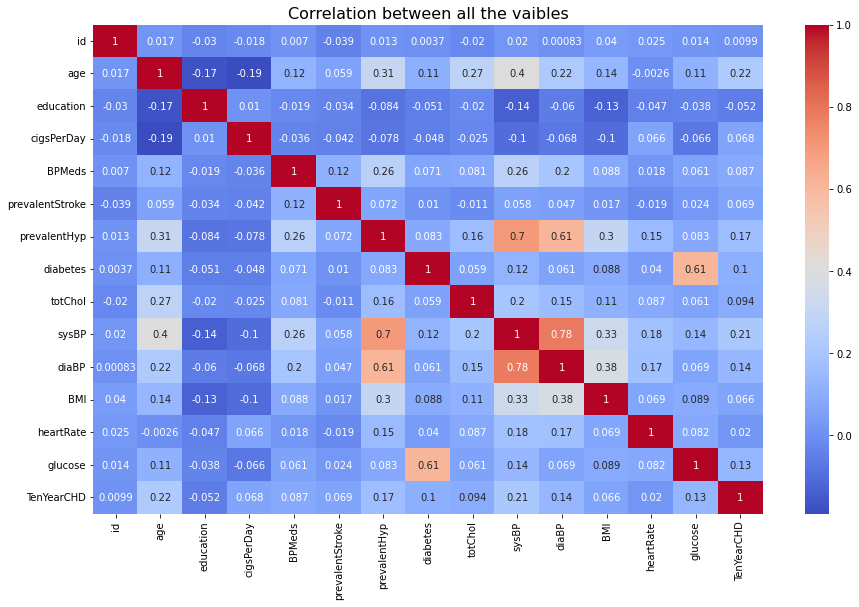

In [14]:
#Heatmap for co-relation in features
plt.figure(figsize=(15, 9))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between all the vaibles', size=16)
plt.show()

In [15]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [16]:
#dividing columns into 'numerical' or 'categorical' datatype
numerical_columns = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']
categorical_columns = ['education','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']

In [17]:
#let's know the range of numrical columns i.e. min and max
print('Minimum Age:', df['age'].min(), '| Maximum Age:',df['age'].max())
print('Least Number of Cigarettes smoked per day:', df['cigsPerDay'].min(), '| Highest Number of Cigarettes smoked per day:',df['cigsPerDay'].max())
print('Minimum Cholesterol:', df['totChol'].min(), '| Maximum Cholesterol:',df['totChol'].max())
print('Minimum Systolic BP:', df['sysBP'].min(), '| Maximum Systolic BP:',df['sysBP'].max())
print('Minimum Diastolic BP:', df['diaBP'].min(), '| Maximum Diastolic BP:',df['diaBP'].max())
print('Minimum BMI Value:', df['BMI'].min(), '| Maximum BMI Value:',df['BMI'].max())
print('Minimum Heart Rate:', df['heartRate'].min(), '| Maximum Heart Rate:',df['heartRate'].max())
print('Minimum Glucose Level:', df['glucose'].min(), '| Maximum Glucose Level:',df['glucose'].max())

Minimum Age: 32 | Maximum Age: 70
Least Number of Cigarettes smoked per day: 0.0 | Highest Number of Cigarettes smoked per day: 70.0
Minimum Cholesterol: 107.0 | Maximum Cholesterol: 696.0
Minimum Systolic BP: 83.5 | Maximum Systolic BP: 295.0
Minimum Diastolic BP: 48.0 | Maximum Diastolic BP: 142.5
Minimum BMI Value: 15.96 | Maximum BMI Value: 56.8
Minimum Heart Rate: 45.0 | Maximum Heart Rate: 143.0
Minimum Glucose Level: 40.0 | Maximum Glucose Level: 394.0


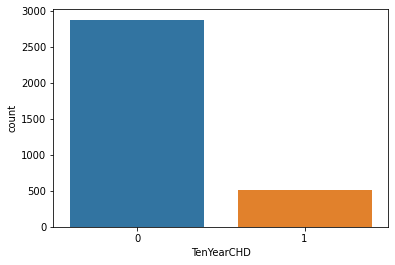

In [18]:
sns.countplot(x=df['TenYearCHD'])

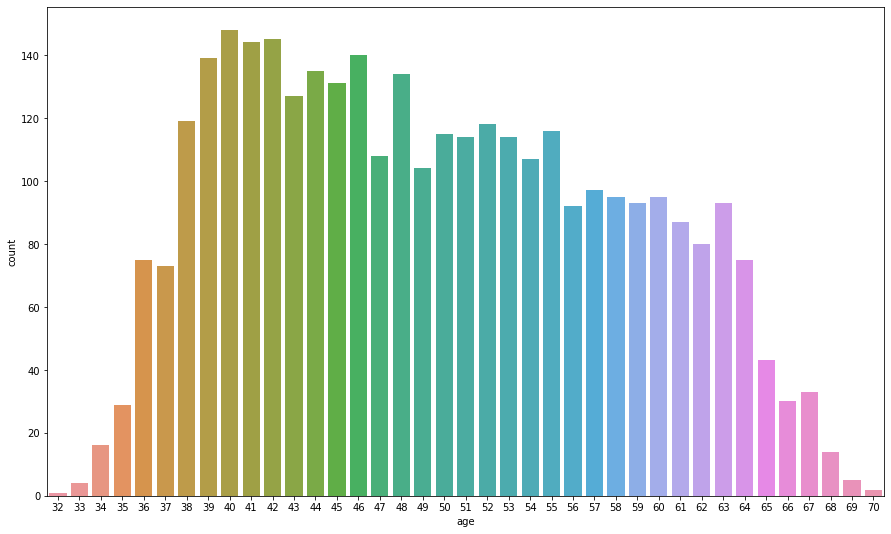

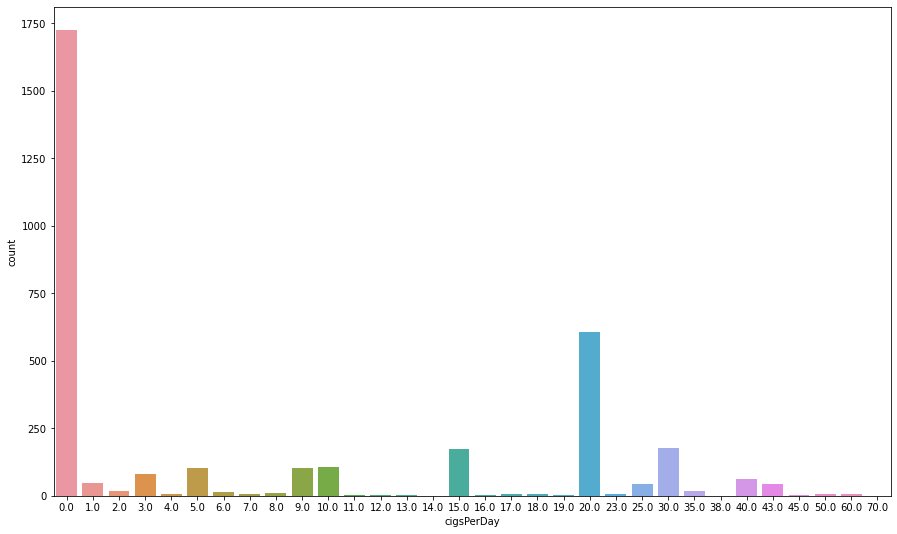

In [19]:
#distplot for numerical features
for val in numerical_columns[:2]:
  plt.figure(figsize=(15,9))
  sns.countplot(x=df[val])
  plt.show()

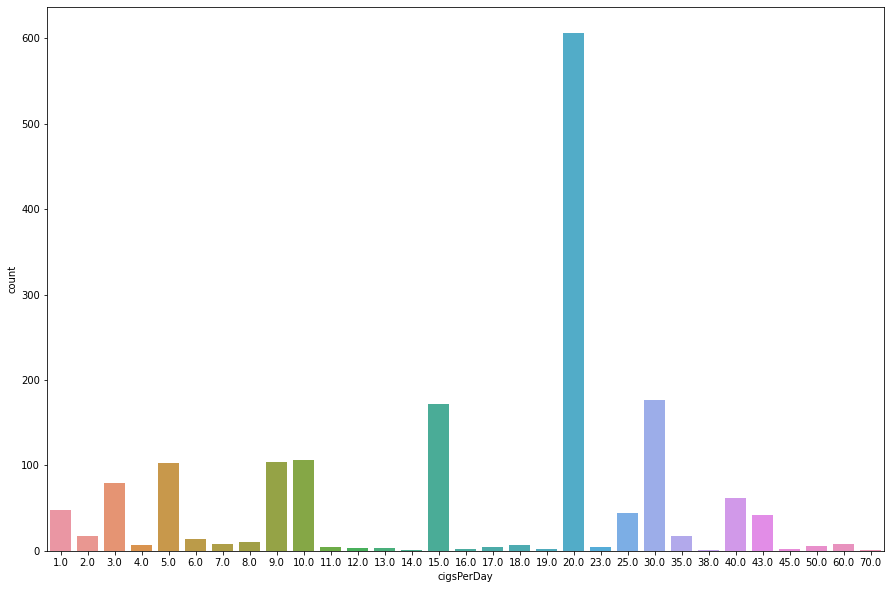

In [20]:
#Make a plot after excluding smokers
plt.figure(figsize=(15,10))
sns.countplot(x=df[df['cigsPerDay']!=0.0]['cigsPerDay'])
plt.show()

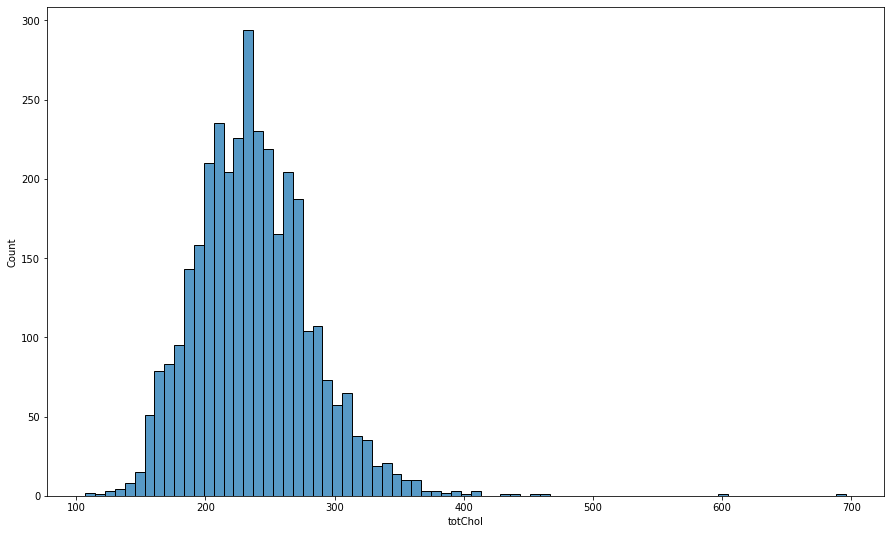

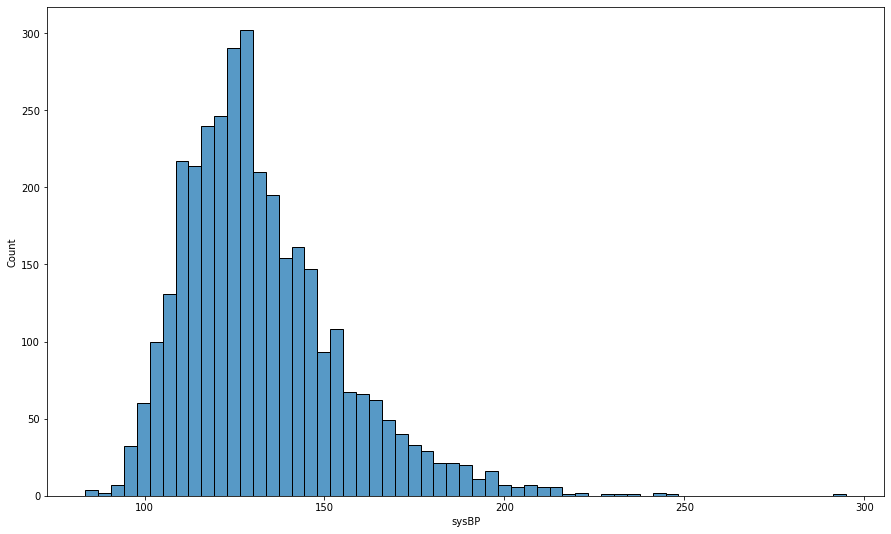

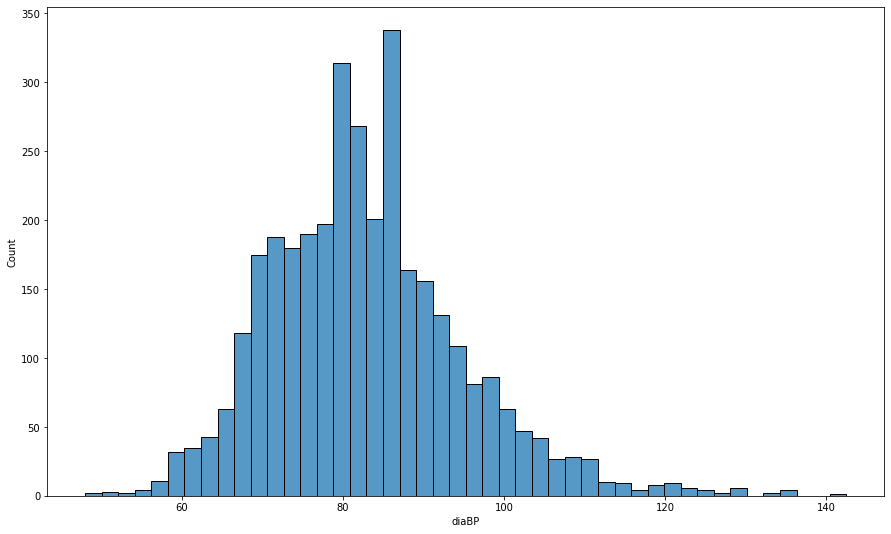

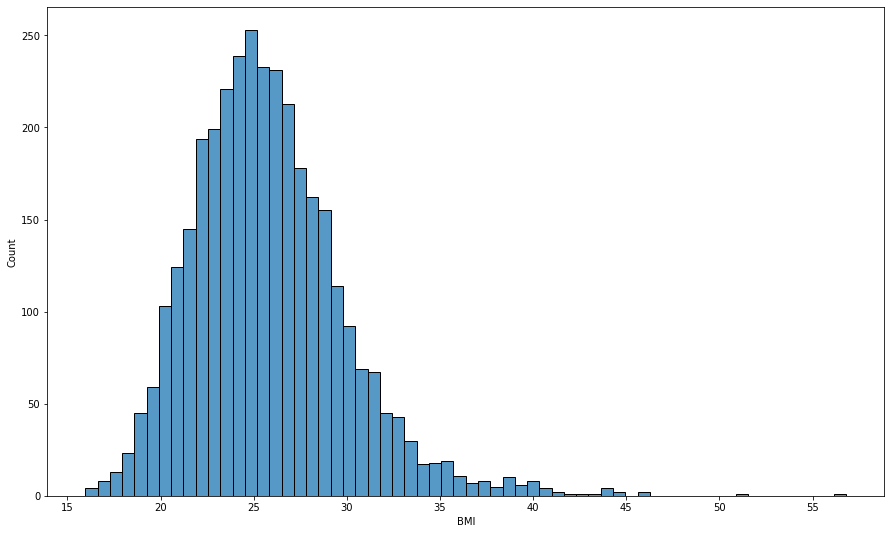

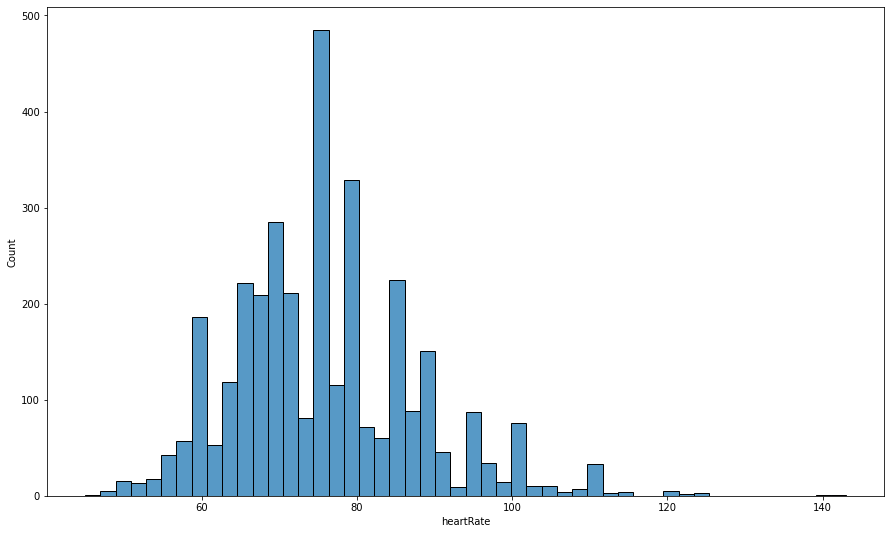

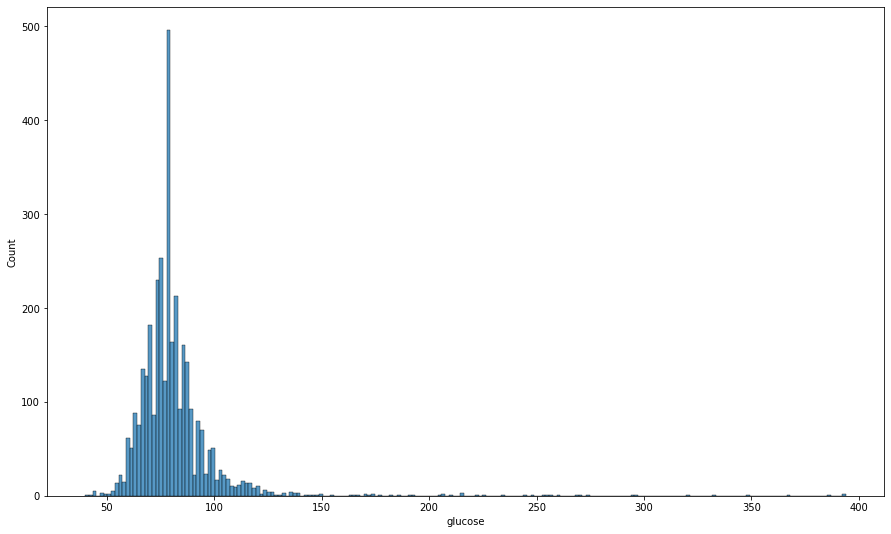

In [29]:
#distplot for numerical features
for val in numerical_columns[2:]:
  plt.figure(figsize=(15,9))
  sns.histplot(x=df[val])
  plt.show()

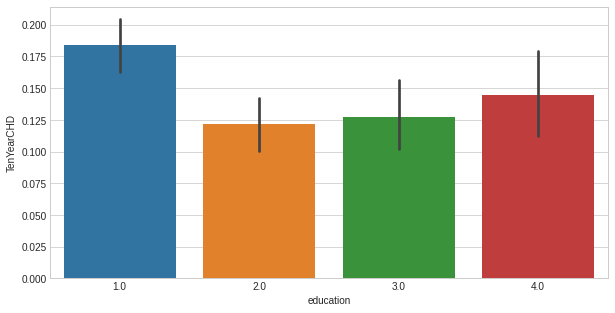

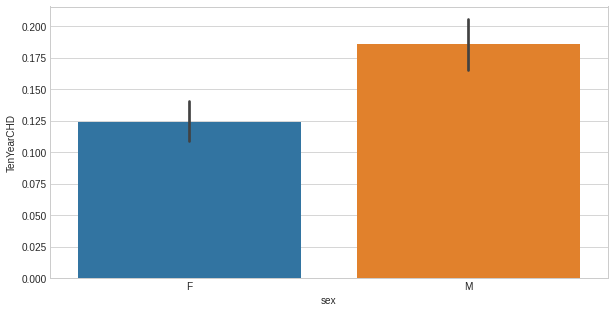

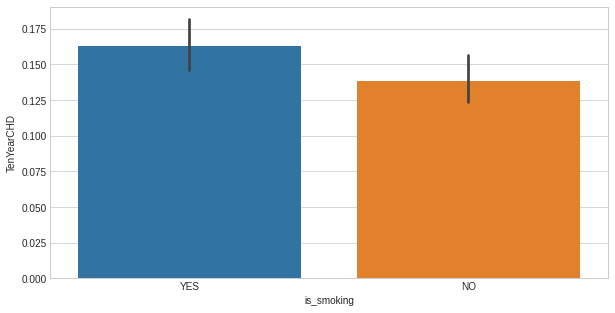

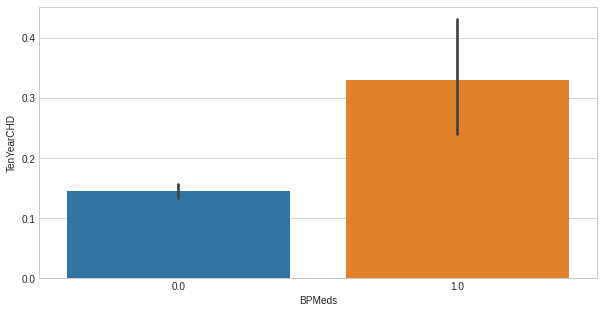

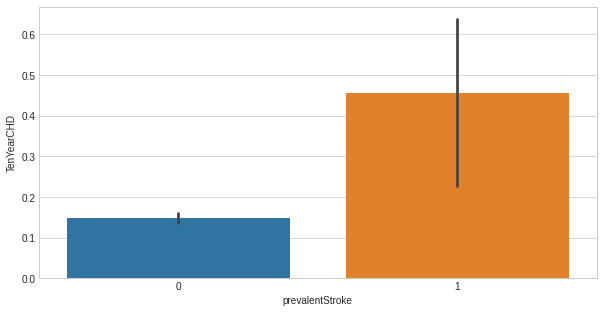

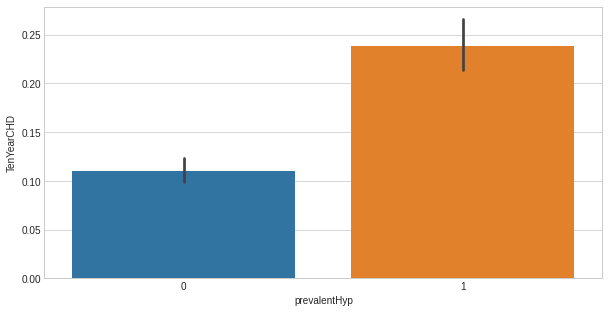

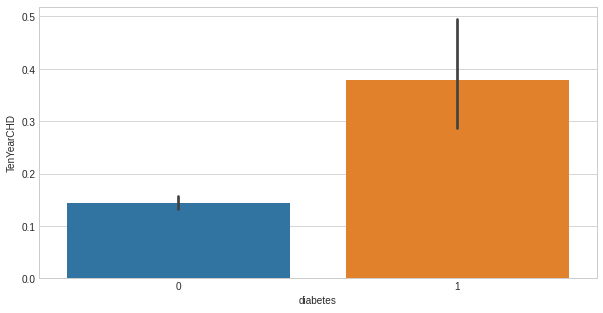

In [30]:
for col in categorical_columns[0:-1]:
  plt.figure(figsize=(10,5))
  plt.style.use('seaborn-whitegrid')
  plots = sns.barplot(data=df,x=col,y='TenYearCHD')

###Ploting different graphs to know the cardiovascular disease based in 'Male' and 'Female' category and keeping other conditions same

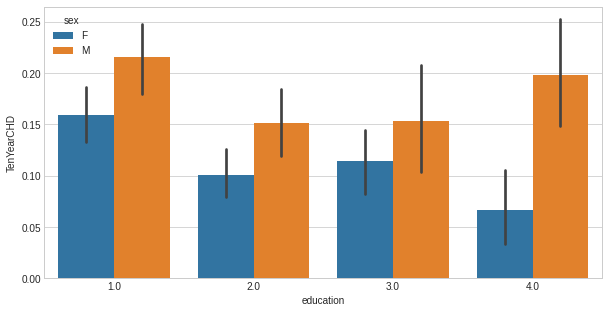

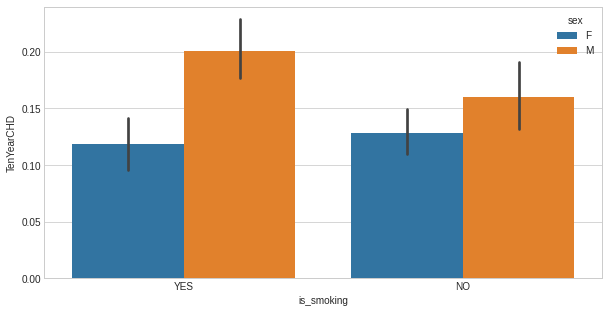

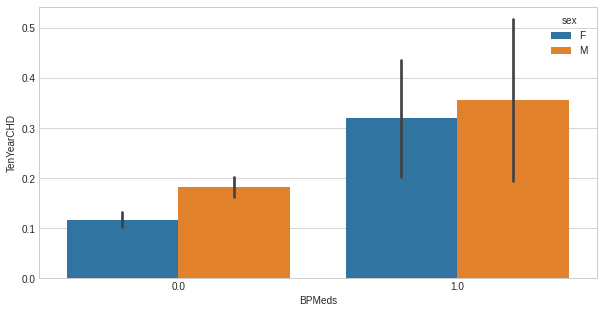

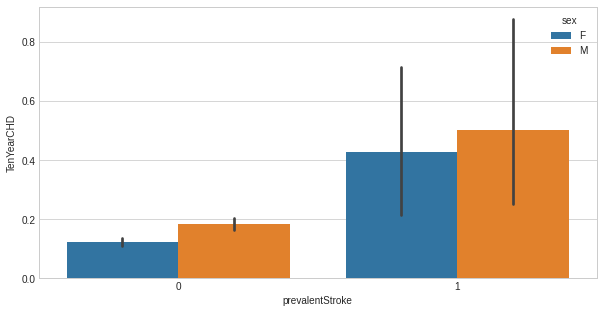

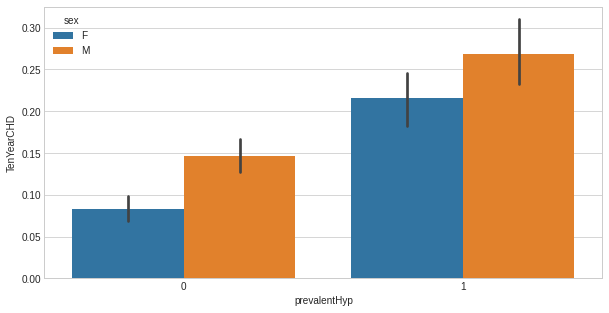

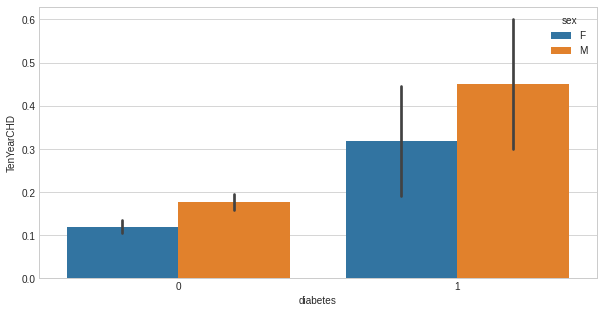

In [31]:
for i in categorical_columns[0:-1]:
  if i!='sex':
    fig,ax=plt.subplots(figsize=(10,5))
    sns.barplot(data=df,x=i,y='TenYearCHD',hue='sex',ax=ax)

In [32]:
#Let us know the ratio of the people who smoke and had heart attack VS not smoke and had heart attack
print(len(df[(df['cigsPerDay']!=0.0) & df['TenYearCHD']==1]), "/", len(df[(df['cigsPerDay']==0.0) & df['TenYearCHD']==1]))
print(len(df[(df['cigsPerDay']!=0.0) & df['TenYearCHD']==0]), "/", len(df[(df['cigsPerDay']==0.0) & df['TenYearCHD']==0]))
#df['cigsPerDay'].value_counts()

274 / 237
3116 / 3153


In [33]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [34]:
#Let's get a dataset with 'TenYearCHD'=1
risk_df = df[df['TenYearCHD']==1]

In [35]:
risk_df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
15,15,51,1.0,M,YES,15.0,0.0,0,0,0,212.0,146.0,89.0,24.49,100.0,132.0,1
20,20,42,1.0,F,YES,20.0,0.0,0,1,0,199.0,141.0,92.0,43.69,80.0,60.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3349,3349,46,2.0,F,NO,0.0,0.0,0,0,0,242.0,129.0,85.0,27.40,80.0,78.0,1
3373,3373,58,1.0,F,NO,0.0,0.0,0,0,1,260.0,85.5,51.0,20.76,87.0,206.0,1
3374,3374,67,2.0,M,YES,60.0,0.0,0,1,0,261.0,170.0,100.0,22.71,72.0,79.0,1
3381,3381,63,1.0,F,NO,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1


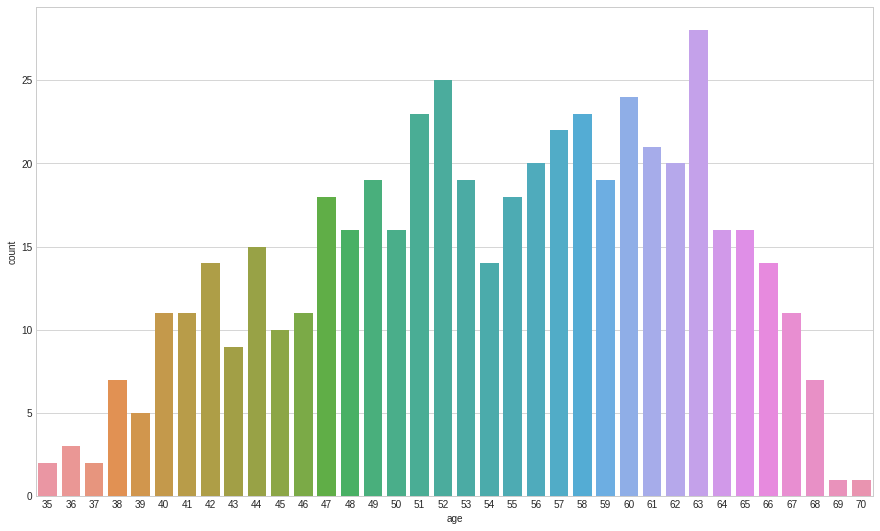

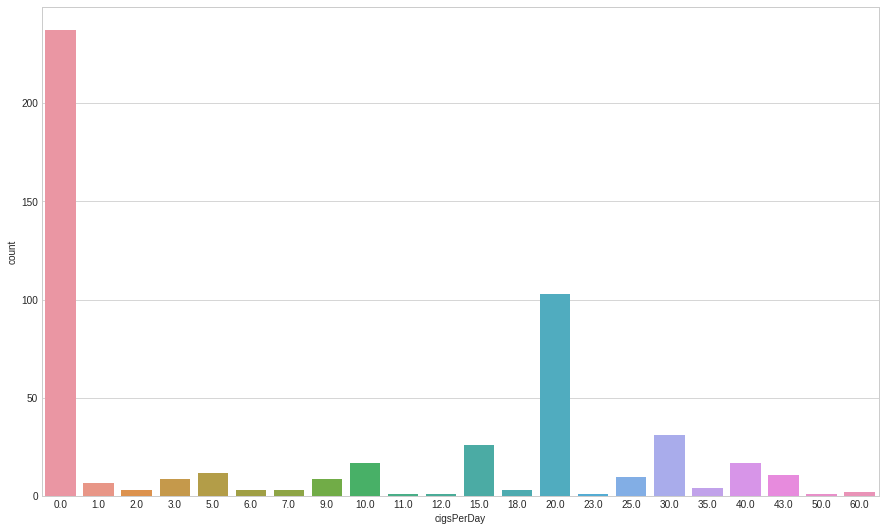

In [36]:
#Plotting graphs to know the distribution of various variables
#distplot for numerical features
for val in numerical_columns[:2]:
  plt.figure(figsize=(15,9))
  sns.countplot(x=risk_df[val])
  plt.show()

In [37]:
risk_df['age'].value_counts().sort_index()

35     2
36     3
37     2
38     7
39     5
40    11
41    11
42    14
43     9
44    15
45    10
46    11
47    18
48    16
49    19
50    16
51    23
52    25
53    19
54    14
55    18
56    20
57    22
58    23
59    19
60    24
61    21
62    20
63    28
64    16
65    16
66    14
67    11
68     7
69     1
70     1
Name: age, dtype: int64

In [38]:
df['age'].value_counts().sort_index()

32      1
33      4
34     16
35     29
36     75
37     73
38    119
39    139
40    148
41    144
42    145
43    127
44    135
45    131
46    140
47    108
48    134
49    104
50    115
51    114
52    118
53    114
54    107
55    116
56     92
57     97
58     95
59     93
60     95
61     87
62     80
63     93
64     75
65     43
66     30
67     33
68     14
69      5
70      2
Name: age, dtype: int64

In [39]:
a = sum(df['age']<=40)
b = sum((df['age']>40) & (df['age']<=50))
c = sum((df['age']>50) & (df['age']<=60))
d = sum((df['age']>60) & (df['age']<=70))

In [40]:
df_noCHD = df[df['TenYearCHD']==0]
df_yesCDH = df[df['TenYearCHD']==1]

In [41]:
aN = sum(df_noCHD['age']<=40)
bN = sum((df_noCHD['age']>40) & (df_noCHD['age']<=50))
cN = sum((df_noCHD['age']>50) & (df_noCHD['age']<=60))
dN = sum((df_noCHD['age']>60) & (df_noCHD['age']<=70))

In [42]:
aY = sum(df_yesCDH['age']<=40)
bY = sum((df_yesCDH['age']>40) & (df_yesCDH['age']<=50))
cY = sum((df_yesCDH['age']>50) & (df_yesCDH['age']<=60))
dY = sum((df_yesCDH['age']>60) & (df_yesCDH['age']<=70))

In [43]:
#creating an age band to know which age group has the highest risk of attack 
data  = {'age_group':['31-40', '41-50', '51-60', '61-70'], 
         'total_individuals': [a, b, c, d],
         'no_chd_total': [aN, bN, cN, dN],
         'yes_chd_total':[aY, bY, cY, dY],
         'risk_VS_noRisk_ratio':[aY/aN, bY/bN, cY/cN, dY/dN]}
age_df = pd.DataFrame(data)

In [44]:
age_df

,age_group,total_individuals,no_chd_total,yes_chd_total,risk_VS_noRisk_ratio
0,31-40,604,574,30,0.052265
1,41-50,1283,1144,139,0.121503
2,51-60,1041,834,207,0.248201
3,61-70,462,327,135,0.412844


The risk of heart disease is nearly doubling after every 10 years.